In [1]:
%pylab inline

/Users/seki/Library/Python/2.7/lib/python/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [5]:
#数学公式门特卡罗估值
import numpy as np
# Parameter Values
S0 = 100. # in itia l index level
K = 105.
T =1.0                     
# strike price
r =0.05 # riskless short rate
sigma =0.2 # volatility
I = 100000 # number of simulations
# V aluation Algorithm
z =np.random . standard_normal(I) # pseudorandom numbers
ST =50 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * z)
# index values at maturity
hT =np.maximum(ST - K, 0) # inner values at maturity
C0 =np.exp(-r * T) * np.sum(hT) / I # Monte Carlo estimator
# Result Output
print "lValue of the European Call Option %5.3f" % C0

lValue of the European Call Option 0.002


/Users/seki/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:13: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()


             Open   High    Low  Close    Volume  Adj Close   Log_Ret  \
Date                                                                    
2017-01-23  12.35  12.38  12.22  12.31  31670700      12.31 -0.004054   
2017-01-24  12.35  12.61  12.34  12.61  34625200      12.61  0.024078   
2017-01-25  12.71  12.80  12.64  12.79  46747800      12.79  0.014173   
2017-01-26  12.65  12.68  12.35  12.37  55672800      12.37 -0.033389   
2017-01-27  12.48  12.54  12.38  12.49  34613900      12.49  0.009654   

            Volatility  
Date                    
2017-01-23    0.086901  
2017-01-24    0.090717  
2017-01-25    0.091251  
2017-01-26    0.093355  
2017-01-27    0.093930  


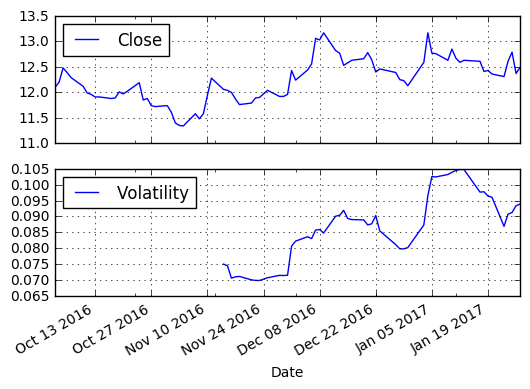

In [9]:
#下载数据，分析
import numpy as np 
import pandas as pd
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2016, 10, 1)
end = datetime.datetime(2017, 1, 27)
#读取网站数据
goog = web.DataReader("F", 'yahoo', start, end)

#波动分析
goog['Log_Ret'] = np.log(goog['Close']/goog['Close'].shift(1))
goog['Volatility']= pd.rolling_std(goog['Log_Ret'],window=30)*np.sqrt(30)
goog[['Close','Volatility']].plot(subplots=True,color='blue',grid=True)# 收盘价格和月波动
print goog.tail()